In [51]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


In [52]:
# loading in park data from GitHub

parks = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-06-22/parks.csv")
parks.dropna(axis=0)
parks2020 = parks[parks['year'] == 2020]
print(parks2020.shape)
parks2020.head(10)



(97, 28)


,year,rank,city,med_park_size_data,med_park_size_points,park_pct_city_data,park_pct_city_points,pct_near_park_data,pct_near_park_points,spend_per_resident_data,...,rec_sr_points,restroom_data,restroom_points,splashground_data,splashground_points,amenities_points,total_points,total_pct,city_dup,park_benches
0,2020,1,Minneapolis,5.7,26.0,15%,38.0,98%,98.0,$319,...,100.0,2.9,91.0,4.0,100.0,79.3,341.0,85.3,Minneapolis,NaN
1,2020,2,"Washington, D.C.",1.4,5.0,24%,50.0,98%,98.0,$307,...,100.0,2.6,80.0,4.1,100.0,80.3,333.0,83.3,"Washington, D.C.",NaN
2,2020,3,St. Paul,3.2,14.0,15%,39.0,99%,99.0,$219,...,100.0,3.2,100.0,1.3,47.0,78.0,330.0,82.5,St. Paul,NaN
3,2020,4,"Arlington, Virginia",2.4,10.0,11%,28.0,99%,99.0,$301,...,76.0,3.1,97.0,2.2,81.0,89.0,326.0,81.5,"Arlington, Virginia",NaN
4,2020,5,Cincinnati,4.4,20.0,14%,36.0,82%,74.0,$190,...,100.0,3.2,98.0,4.5,100.0,92.5,323.0,80.6,Cincinnati,NaN
5,2020,6,Portland,4.9,22.0,18%,47.0,90%,85.0,$250,...,38.0,6.1,100.0,2.1,79.0,65.0,319.0,79.8,Portland,NaN
6,2020,7,Irvine,6.1,28.0,27%,50.0,82%,73.0,$215,...,100.0,3.2,98.0,0.7,25.0,67.3,318.0,79.6,Irvine,NaN
7,2020,8,San Francisco,1.3,4.0,21%,50.0,100%,100.0,$399,...,52.0,2.4,75.0,1.0,36.0,61.7,316.0,78.9,San Francisco,NaN
8,2020,9,Boston,1.4,4.0,17%,45.0,100%,100.0,$162,...,63.0,1.0,29.0,10.3,100.0,65.2,306.0,76.5,Boston,NaN
9,2020,10,Chicago,2.2,9.0,10%,24.0,98%,98.0,$179,...,100.0,2.4,73.0,8.8,100.0,73.2,304.0,76.0,Chicago,NaN


In [53]:
parks2020.dtypes

year                           int64
rank                           int64
city                          object
med_park_size_data           float64
med_park_size_points         float64
park_pct_city_data            object
park_pct_city_points         float64
pct_near_park_data            object
pct_near_park_points         float64
spend_per_resident_data       object
spend_per_resident_points    float64
basketball_data              float64
basketball_points            float64
dogpark_data                 float64
dogpark_points               float64
playground_data              float64
playground_points            float64
rec_sr_data                  float64
rec_sr_points                float64
restroom_data                float64
restroom_points              float64
splashground_data            float64
splashground_points          float64
amenities_points             float64
total_points                 float64
total_pct                    float64
city_dup                      object
p

In [54]:
np.median(parks2020.med_park_size_data)

5.2

In [55]:
# Cherry picking
# Plotting everything
# Misguided context
# Has the effect but its very muted

# Put in titles/captions that can guide people to the wrong conclusion
# Can use sorting but it can't break relationships
# What statistics are easy for cherry picking?
# Spending/taxation is a major issue
# How influence opinions about facts using truth

# You need to define where these points come from (Non-Profit), a known phrase to highlight the points 
# ParkScore Index Rating
# This index is supposed to indicate how accessible these greenspaces are

/var/folders/d0/fxj44wqx1gg93vzw2qsyk67w0000gn/T/ipykernel_37871/540673709.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  x = parks2020.spend_per_resident_data.str.replace("$", "").astype(float)


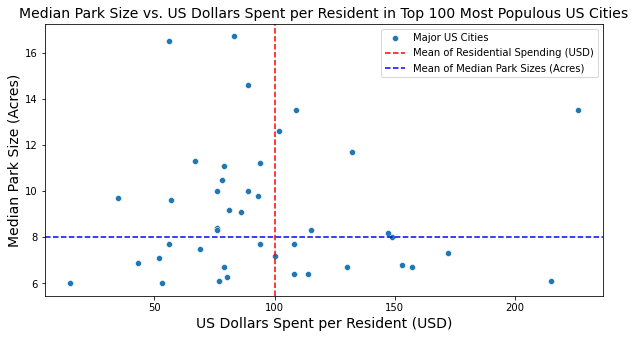

In [56]:
# Ofuscated Visualization based on Cherry Picking the Data

x = parks2020.spend_per_resident_data.str.replace("$", "").astype(float)
y = parks2020.med_park_size_data

x_string = parks2020.spend_per_resident_data.astype(str)
y_string = parks2020.med_park_size_data.astype(str)

plt.figure(figsize=(10,5))

misleadY = y.copy()
for i in range(len(misleadY)):
    if misleadY[i] < 6:
        misleadY.pop(i)
mislead = sns.scatterplot(data=parks2020, x=x, y=misleadY)

mislead.axvline(100, c='red', ls='--')
mislead.axhline(8, c='blue', ls='--')
mislead.set_xlabel("US Dollars Spent per Resident (USD)", size = 14)
mislead.set_ylabel("Median Park Size (Acres)", size = 14)
mislead.set_title('Median Park Size vs. US Dollars Spent per Resident in Top 100 Most Populous US Cities', size = 14)


plt.legend(labels=['Major US Cities', 'Mean of Residential Spending (USD)', 'Mean of Median Park Sizes (Acres)'])

# for line in range(0,parks2020.shape[0]):
#      mislead.text(x[line], parks2020.med_park_size_data[line], 
#                   parks2020.city[line],
#                   horizontalalignment='left', size='medium', color='black', weight='semibold')

# for i, parks2020.city in enumerate (parks2020.city):
#     plt.annotate(parks2020.city, (parks2020[x[i]]+0.7, y[i]+0.5) )

# for i, val in enumerate(zip(parks2020.spend_per_resident_data,parks2020.med_park_size_data)):
#     label = str(parks2020.loc[i, 'city'])
#     mislead.annotate(text=label, xy=(i, val[1]))

plt.show()


A scatterplot comparing the US dollar amount (USD) spent per resident to the median park sizes (acres) in major US cities. Each point represents a US city. Here, we can see that residents in cities who spend less than 100 dollars tend to get more park acreage than residents in cities that spend more money. 15 US cities whose residents spend 100 dollars or less had median park acreages larger than 8 acres compared to the 6 cities whose residents spend more than 100 dollars that had median park acreages larger than 8 acres. There is more than double the amount of cities with less residential spending that have larger parks than cities with more residential spending for parks. This indicates that per resident, some citizens are spending more money for smaller park spaces within their cities compared to cities with less residential spending. The x and y dashed lines represent both the average spent per resident in a city and the average of the median park sizes of all the cities respectively. 

Citation: The Trust For Public Land. _Parkscore Index._ The Trust For Public Land, Assessed 02 November 2022, https://www.tpl.org/parkserve/downloads

In order to obscure this data, I first had to convert the percentage points into float values by using string functions to drop the percentage character. I first double checked what the data types of all of the columns were by using another function to chack their data types. After dropping the percentage character and seeing that the percentage points were string objects I converted the percentage points to integer types for the purpose of plotting the data on an x, y scatterplot. Finally, to obfuscate the data, I cherry picked the data that you see above by limiting the limites of the x and y axes. This alteration of the axes was designed to present the data as if there were more cities that had larger parks and less residential spending. I wanted to show a narrative that residential spending does not necessarily help improve increasing more green space around cities and that people should therefore spend less money towards those efforts for different things. I try to also highlight this through the title of the ofusctated graph as well to establish this narrative.

/var/folders/d0/fxj44wqx1gg93vzw2qsyk67w0000gn/T/ipykernel_37871/836248496.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  x = parks2020.spend_per_resident_data.str.replace("$", "").astype(float)


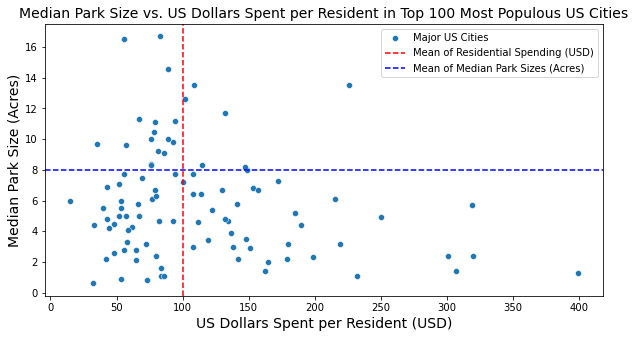

In [58]:
# Real Visualization

x = parks2020.spend_per_resident_data.str.replace("$", "").astype(float)
y = parks2020.med_park_size_data

misleadY = y.copy()
for i in range(len(misleadY)):
    if misleadY[i] < 0:
        misleadY.pop(i)
plt.figure(figsize=(10,5))
mislead = sns.scatterplot(data=parks2020, x=x, y=misleadY)
mislead.axvline(100, c='red', ls='--')
mislead.axhline(8, c='blue', ls='--')
mislead.set_xlabel("US Dollars Spent per Resident (USD)", size = 14)
mislead.set_ylabel("Median Park Size (Acres)", size = 14)
mislead.set_title('Median Park Size vs. US Dollars Spent per Resident in Top 100 Most Populous US Cities', size = 14)

plt.legend(labels=['Major US Cities', 'Mean of Residential Spending (USD)', 'Mean of Median Park Sizes (Acres)'])

plt.show()

A scatterplot comparing the US dollar amount (USD) spent per resident to the median park sizes (acres) in major US cities. Each point represents a US city. This graph is intended to provide the full data and the full scope of the narrative through expanding both the x and y axes to their full lengths. The x and y dashed lines represent both the average spent per resident in a city and the average of the median park sizes of all the cities respectively. This graph does not cherry pick the data and it shows that there are also a lot of parks less than the median size of 8 acres that also has lower spending too.

Citation: The Trust For Public Land. _Parkscore Index._ The Trust For Public Land, Assessed 02 November 2022, https://www.tpl.org/parkserve/downloads

In [ ]:
# Back up code for different version of ofuscated visualization

# x = parks2020.spend_per_resident_data.str.replace("$", "").astype(float)
# y = parks2020.med_park_size_data
# misleadY = y.copy()
# for i in range(len(misleadY)):
#     if misleadY[i] < 0:
#         misleadY.pop(i)
# mislead = sns.scatterplot(data=parks2020, x=misleadY, y=x)